# Association Rule Mining

Install "mlxtend" and "networkx"

In [1]:
#!pip install mlxtend

In [2]:
#!pip install networkx

Import required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

Importing groceries file from folder

In [4]:
data = pd.read_csv('/content/groceries.csv')
df = data.copy()
df.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [5]:
df.shape

(700, 1)

Making sure all items in lower case

In [6]:
df['Items'] = df['Items'].str.lower()

In [7]:
df.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


### Converting into List

<img src="grocery.jpg" width=65%>


In [8]:
#CONVERTING TO ARRAY FOR DOING ONE - HOT ENCODING
items = df['Items'].str.split(',').values
type(items)

numpy.ndarray

In [9]:
items.shape

(700,)

In [10]:
items.tolist()

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'uht-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [11]:
items = items.tolist()
type(items)

list

### Applying One Hot Transaction for Apriori Algorithm

What is One Hot Encoding or Transaction?

<img src="https://i.imgur.com/mtimFxh.png" width=500, height=400>

In [19]:
# For One-Hot encoding
!pip install mlxtend --upgrade
!pip install mlxtend --upgrade

from mlxtend.preprocessing import TransactionEncoder

# Your dataset of items
items = [['apple', 'banana', 'orange'], ['banana', 'orange'], ['apple', 'orange'], ['banana']]

# Initialize TransactionEncoder
oht = TransactionEncoder()

# Fit and transform the dataset
oht_ary = oht.fit(items).transform(items)

# Convert to DataFrame for better readability (optional)
import pandas as pd
oht_df = pd.DataFrame(oht_ary, columns=oht.columns_)

print(oht_df)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   apple  banana  orange
0   True    True    True
1  False    True    True
2   True   False    True
3  False    True   False


In [20]:
oht.columns_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['apple', 'banana', 'orange']

In [21]:
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,apple,banana,orange
0,True,True,True
1,False,True,True
2,True,False,True
3,False,True,False


In [22]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4, 3)

Applying Apriopri algorithm with minimum support 1%

In [24]:
# For Apriori Algorithm
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
print(frequent_itemsets)

   support                 itemsets
0     0.50                  (apple)
1     0.75                 (banana)
2     0.75                 (orange)
3     0.25          (apple, banana)
4     0.50          (apple, orange)
5     0.50         (orange, banana)
6     0.25  (apple, orange, banana)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Making rules using at least 50% confidence

In [25]:
# For Association Rules
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(apple),(banana),0.50,0.75,0.25,0.500000,0.666667,-0.1250,0.50,-0.500000
1,(apple),(orange),0.50,0.75,0.50,1.000000,1.333333,0.1250,inf,0.500000
2,(orange),(apple),0.75,0.50,0.50,0.666667,1.333333,0.1250,1.50,1.000000
3,(orange),(banana),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75,-0.333333
4,(banana),(orange),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75,-0.333333
5,"(apple, orange)",(banana),0.50,0.75,0.25,0.500000,0.666667,-0.1250,0.50,-0.500000
6,"(apple, banana)",(orange),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf,0.333333
7,"(orange, banana)",(apple),0.50,0.50,0.25,0.500000,1.000000,0.0000,1.00,0.000000
8,(apple),"(orange, banana)",0.50,0.50,0.25,0.500000,1.000000,0.0000,1.00,0.000000


Checking comparison of Support, Confidence and Lift

In [29]:
support = rules[['support']].to_numpy()
confidence = rules[['confidence']].to_numpy()
lift = rules[['lift']].to_numpy()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


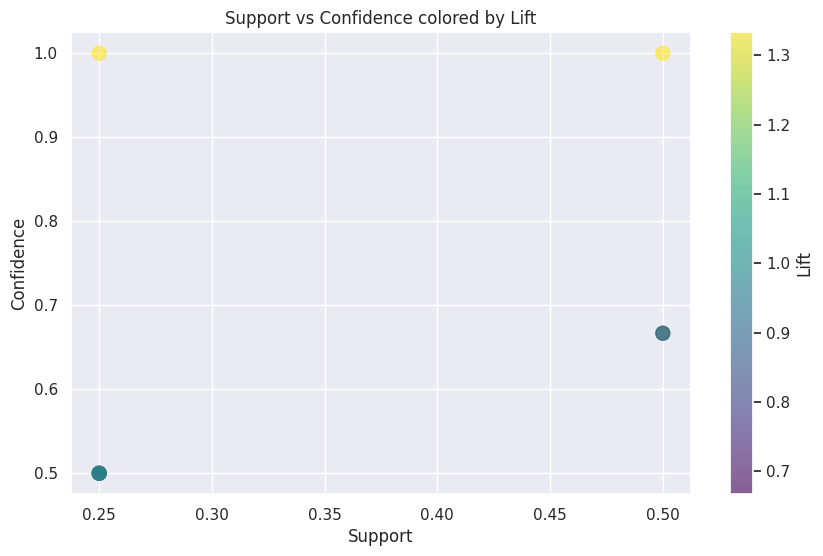

In [33]:
import matplotlib.pyplot as plt

def draw_plot(support, confidence, lift):
    plt.figure(figsize=(10,6))
    plt.scatter(support, confidence, c=lift, cmap='viridis', s=100, alpha=0.6)
    plt.colorbar(label='Lift')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence colored by Lift')
    plt.grid(True)
    plt.show()

# Now you can call this function
draw_plot(support, confidence, lift)


### Network Graph

A network graph consists of "Node" for each event and "Edge" which defines relation which can be undirected, directed or wighted

<img src="network.png" width=45%><img src="social.png" width=45%>


**Network Graph Types**

<img src="https://www.ebi.ac.uk/training/online/sites/ebi.ac.uk.training.online/files/resize/Fig_edge_types-700x251.png">

<img src="http://www.r-graph-gallery.com/wp-content/uploads/2017/04/247_igraph_layout_types.png" width=60%>

The function of plotting directed network graph for Association rules visualization is made in the helper file

Plotting network graph

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


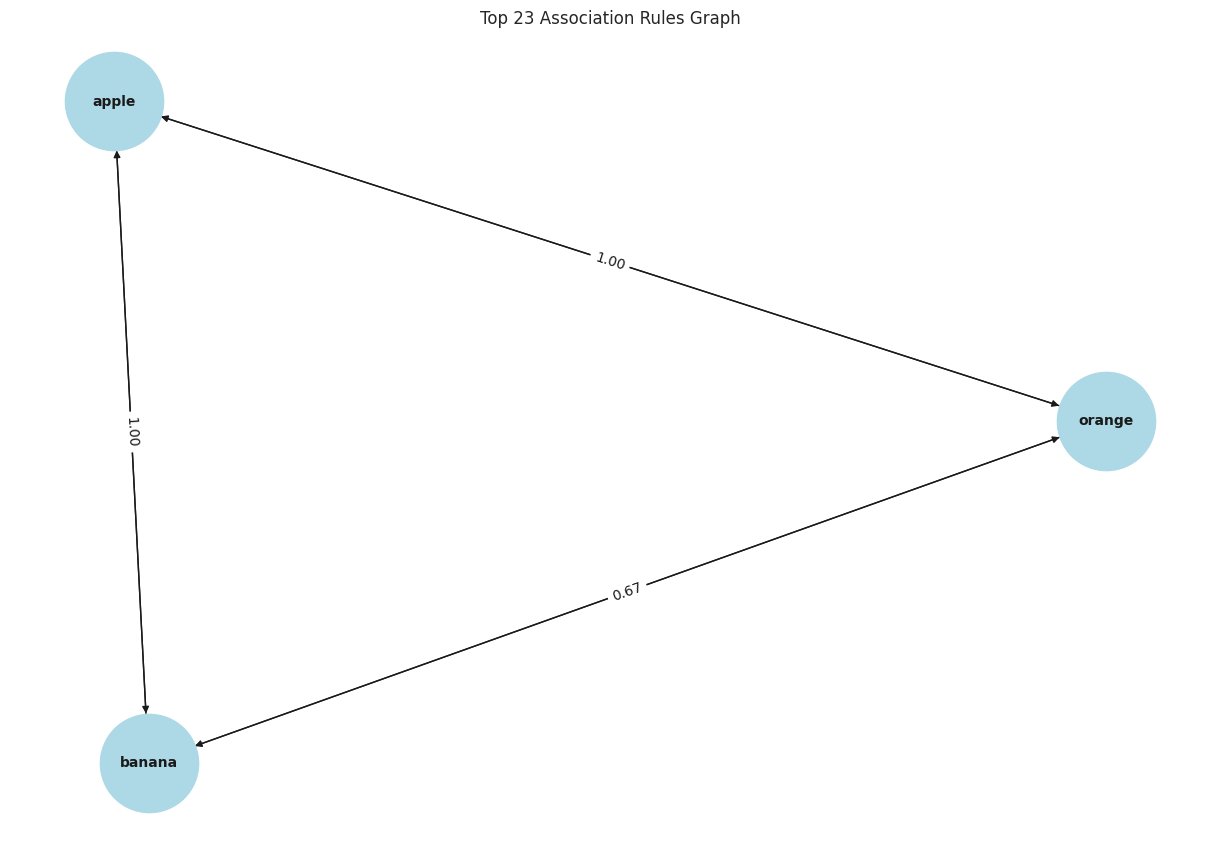

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(rules, top_n=10):
    # Create a directed graph
    G = nx.DiGraph()

    # Add edges (associations) between antecedents and consequents
    for i in range(min(top_n, len(rules))):
        for antecedent in rules.iloc[i]['antecedents']:
            for consequent in rules.iloc[i]['consequents']:
                G.add_edge(antecedent, consequent, weight=rules.iloc[i]['lift'])

    # Set the layout for the nodes
    pos = nx.spring_layout(G)

    # Draw the graph
    plt.figure(figsize=(12,8))
    nx.draw(G, pos, with_labels=True, node_size=5000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)

    # Draw the edge labels for lift values
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v): f'{d:.2f}' for u,v,d in G.edges(data='weight')})

    plt.title(f'Top {top_n} Association Rules Graph')
    plt.show()

# Call the function with your rules
draw_graph(rules, 23)
